## Workflow Project Design

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Description - Personality classification

The Myers Briggs Type Indicator (or MBTI for short) is a personality type system that divides everyone into 16 distinct personality types across 4 axis:

- Introversion (I) – Extroversion (E)
- Intuition (N) – Sensing (S)
- Thinking (T) – Feeling (F)
- Judging (J) – Perceiving (P)


In [8]:
df = pd.read_csv('data/train.csv')
df.head()

,Unnamed: 0,type,posts
0,6797,INTJ,Arose|||Smear|||Thick|||Clamp|||Claim|||Manic|...
1,7668,INTP,'I usually act or more specifically speak befo...
2,4321,INFP,'https://www.youtube.com/watch?v=GhOQngecTGU||...
3,4164,ENFP,'I really like languages too and that's why I'...
4,1038,INTP,"'That is what I want to do, but that would mak..."


In [9]:
def var_row(row):
    l = []
    for i in row.split('|||'):
        l.append(len(i.split()))
    return np.var(l)

df['words_per_comment'] = df['posts'].apply(lambda x: len(x.split())/50)
df['variance_of_word_counts'] = df['posts'].apply(lambda x: var_row(x))
df.head()

,Unnamed: 0,type,posts,words_per_comment,variance_of_word_counts
0,6797,INTJ,Arose|||Smear|||Thick|||Clamp|||Claim|||Manic|...,10.30,176.801600
1,7668,INTP,'I usually act or more specifically speak befo...,30.64,50.795600
2,4321,INFP,'https://www.youtube.com/watch?v=GhOQngecTGU||...,23.06,190.973291
3,4164,ENFP,'I really like languages too and that's why I'...,17.10,178.153600
4,1038,INTP,"'That is what I want to do, but that would mak...",30.50,122.569600


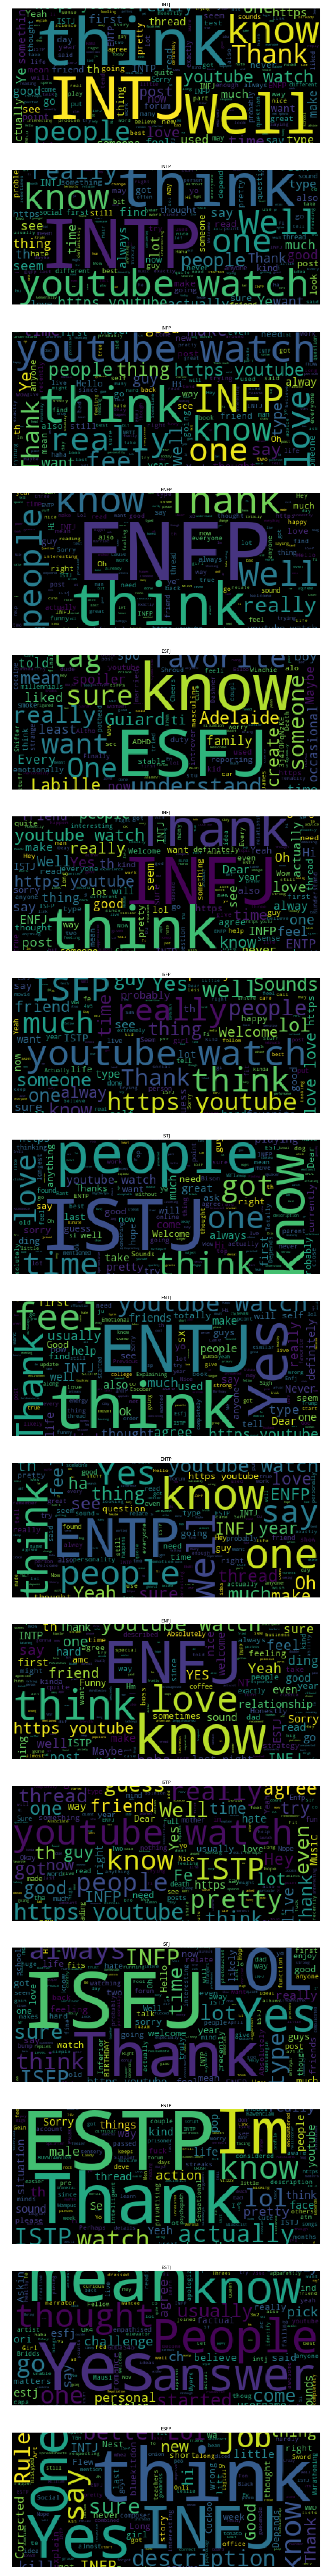

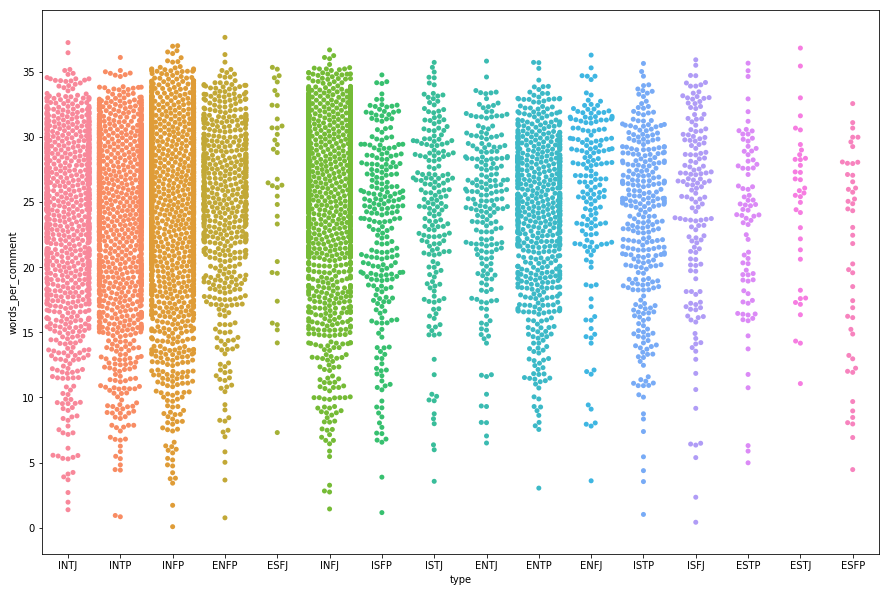

In [10]:
plt.figure(figsize=(15,10))
sns.swarmplot("type", "words_per_comment", data=df)
plt.show()

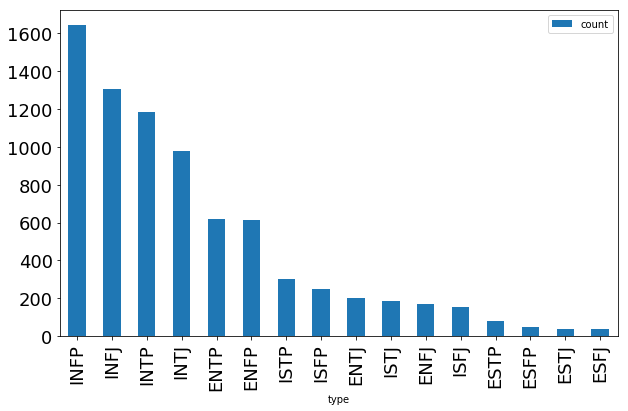

In [11]:
df.groupby('type').count()[['posts']].rename(
    columns={'posts': 'count'}).sort_values(
    'count', ascending=False).reset_index().plot.bar(
        x='type', y='count', figsize=(10, 6), fontsize=18);
plt.show()

In [12]:
from scipy.misc import imread
from wordcloud import WordCloud, STOPWORDS

fig, ax = plt.subplots(len(df['type'].unique()), sharex=True, figsize=(15,8*len(df['type'].unique())))

k = 0
for i in df['type'].unique():
    df_4 = df[df['type'] == i]
    wordcloud = WordCloud().generate(df_4['posts'].to_string())
    ax[k].imshow(wordcloud)
    ax[k].set_title(i)
    ax[k].axis("off")
    k+=1
fig.show()

/Users/panxiao/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


### Business Case

### 7 Questions :

- Q1: What do we want to predict? How will a good prediction improve a key performance indicator (KPI) or lead to a scientific result?
- Q2: How do we measure the quality or value of the prediction in the selected business or science problem? What will be the quantitative score? How does the quantitative score reflect the quality or value of the prediction? How does the (possibly asymmetric) prediction error convert into cost or decreased KPI?
- Q3: Will the predictor be used as decision support, as a part of a fully automated system, or only as part of a report or feasibility study? How will an agent use the system?
- Q4: What data do we need to develop a predictor? Could you find this data? What were the actual data sources? What other sources (private or public) could be exploited? What were and would be the data collection costs?
- Q5: What data cleaning/tidying steps were required to obtain clean training data?
- Q6: Given the data source(s) and the prediction goal, what is the workflow and the workflow elements? Will you need different expertise for the different steps?
- Q7: How fast the phenomena underlying the prediction problem change? How often the model will have to be retrained? What are the associated costs and risks?

### Q1 : What to predict ?

### Q4.1 What data do we need to develop a predictor? Could you find this data?

The data we need for developping a predictor can be found profoundly on the website. 
One example is the kaggle: https://www.kaggle.com/laowingkin/mbti-study-personality
Other data can be equivalently scrapped from the web, the only difficulty is the label

### Q4.2 What were the actual data sources? What other sources (private or public) could be exploited? 

Unlabeled data could be easily exploited.

### Q4.3 What were and would be the data collection costs?

very little cost for posts (scrappers, ect.). Yet the labels could be expansive to get.


### Q5: What data cleaning/tidying steps were required to obtain clean training data?

The special steps depend on the demand of classifiers, but generally we need the following steps to import, split, clean, stem, and feature engineer. 

We will go through the basics for doing data analysis, and then create a framework for general data analysis tasks.

To be more specific:
 
- data import, replace some special symbols, or fillna
- data storage, feature extraction and clean (here we also list several possibilities like the stem of words, the word to graph function, the vectorization of words, ect.)
- statistical analysis (analyse statistique)

this is an example for non time series data.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# data path
train_filename = 'data/train.csv'

'''or by the following'''
data = pd.read_csv(train_filename,  encoding='utf-8')
# fillna prefer not to be done when import data
#data = data.fillna('')
data

,type,posts
0,INFJ,'http://www.youtube.com/watch?v=qsXHcwe3krw|||...
1,ENTP,'I'm finding the lack of me in these posts ver...
2,INTP,'Good one _____ https://www.youtube.com/wat...
3,INTJ,"'Dear INTP, I enjoyed our conversation the o..."
4,ENTJ,'You're fired.|||That's another silly misconce...
5,INTJ,'18/37 @.@|||Science is not perfect. No scien...
6,INFJ,"'No, I can't draw on my own nails (haha). Thos..."
7,INTJ,'I tend to build up a collection of things on ...
8,INFJ,"I'm not sure, that's a good question. The dist..."
9,INTP,'https://www.youtube.com/watch?v=w8-egj0y8Qs||...


In [3]:
import re
import nltk
import string
import igraph
import itertools
import unicodedata
from nltk.corpus import stopwords
from nltk import pos_tag

In [11]:
def clean_text(text, my_stopwords, punct, remove_stopwords=True, lower_case=True):
    #print(text)

    if lower_case:
        text = text.lower()
    text = ''.join(l for l in text if l not in punct)  # remove punctuation (preserving intra-word dashes)
    text = re.sub(' +', ' ', text)  # strip extra white space
    text = text.strip()  # strip leading and trailing white space
    # tokenize (split based on whitespace)
    tokens = text.split(' ')

    if remove_stopwords:
        # remove stopwords
        tokens = [token for token in tokens if token not in my_stopwords]

    return tokens


def pos_filter(tokens):
    # POS tag and retain only nouns and adjectives
    tagged_tokens = pos_tag(tokens)
    tokens_keep = []
    for item in tagged_tokens:
        if (
            item[1] == 'NN' or
            item[1] == 'NNS' or
            item[1] == 'NNP' or
            item[1] == 'NNPS' or
            item[1] == 'JJ' or
            item[1] == 'JJS' or
            item[1] == 'JJR' or
            item[1] == 'WP' or
            item[1] == 'WRB' or
            item[1] == 'WDT' or
            item[1] == 'PRP' or
            item[1] == 'CD' or
            item[1] == 'VB' or
            item[1] == 'VBZ' or
            item[1] == 'VBD' or
            item[1] == 'VBN' or
            item[1] == 'RB' # verb
        ):
            # keep some kinds of tags
            tokens_keep.append(item[0])

    tokens = tokens_keep

    return tokens, tagged_tokens

def strip_accents_unicode(s):
    s = unicodedata.normalize('NFD', s)
    s = s.encode('ascii', 'ignore')
    s = s.decode("utf-8")
    return str(s)

def stem_words(tokens):
    # apply Porter's stemmer
    stemmer = nltk.stem.PorterStemmer()
    tokens_stemmed = list()
    for token in tokens:
        tokens_stemmed.append(stemmer.stem(token))
    tokens = list(map(lambda x : strip_accents_unicode(x), tokens_stemmed))

    return (tokens)


def terms_to_graph(terms, w):
    '''This function returns a directed, weighted igraph from a list of terms
    (the tokens from the pre-processed text) e.g., ['quick','brown','fox'].
    Edges are weighted based on term co-occurence
    within a sliding window of fixed size 'w'.
    '''
    print(terms)

    if w > len(terms):
        w = len(terms)

    from_to = {}

    # create initial complete graph (first w terms)
    terms_temp = terms[0:w]
    indexes = list(itertools.combinations(range(w), r=2))

    new_edges = []

    for my_tuple in indexes:
        #print(my_tuple, terms_temp)
        new_edges.append(tuple([terms_temp[i] for i in my_tuple]))

    for new_edge in new_edges:
        if new_edge in from_to:
            from_to[new_edge] += 1
        else:
            from_to[new_edge] = 1

    # then iterate over the remaining terms
    for i in range(w, len(terms)):
        considered_term = terms[i]  # term to consider
        terms_temp = terms[(i - w + 1):(i + 1)]  # all terms within sliding window

        # edges to try
        candidate_edges = []
        for p in range(w - 1):
            candidate_edges.append((terms_temp[p], considered_term))

        for try_edge in candidate_edges:
            if try_edge[1] != try_edge[0]:
                # if not self-edge

                # if edge has already been seen, update its weight
                if try_edge in from_to:
                    from_to[try_edge] += 1

                # if edge has never been seen, create it and assign it a unit weight
                else:
                    from_to[try_edge] = 1

    # create empty graph
    g = igraph.Graph(directed=True)

    # add vertices
    sorted_terms = sorted(set(terms))
    g.add_vertices(sorted_terms)
    g.vs["label"] = sorted_terms

    # add edges, direction is preserved since the graph is directed
    g.add_edges(from_to.keys())

    # set edge and vertex weights
    g.es['weight'] = from_to.values()  # based on co-occurence within sliding window
    #g.vs['weight'] = g.strength(weights=from_to.values())  # weighted degree

    return (g)

In [12]:
mystopwords = stopwords.words('english')
clt = clean_text(data.iloc[3, 1], my_stopwords=mystopwords, punct=string.punctuation)
tokens, tagged_tokens = pos_filter(tokens=clt)
token_stem = stem_words(tokens)
print(token_stem)
gra = terms_to_graph(token_stem, w=4)

['dear', 'intp', 'enjoy', 'convers', 'day', 'esoter', 'gab', 'natur', 'univers', 'idea', 'rule', 'social', 'code', 'arbitrari', 'construct', 'entj', 'sub', 'long', 'time', 'see', 'sincer', 'alphanon', 'type', 'hurt', 'deep', 'existenti', 'way', 'part', 'ofprob', 'scale', 'depend', 'individu', 'prefer', 'everyth', 'humanitydraco', 'malfoy', 'also', 'id', 'he', 'either', '358', '368im', 'either', '358', '385', 'somewhat', 'arbitrari', 'distinct', 'core', 'indic', 'primari', 'motiv', 'hand', 'action', 'therefor', 'aim', 'particularli', 'introvert', 'extravert', 'person', 'said', 'say', 'im', 'somewhat', 'unphas', 'social', 'interact', 'alon', 'anyth', 'isdear', 'type', '9', 'infp', 'absolut', 'admir', 'your', 'great', 'girlfriend', 'wish', 'didnt', 'busi', 'schedul', 'around', 'one', 'often', 'still', 'mean', '150', 'peopl', 'ive', 'probabl', 'seen', '12', 'other', 'today', 'never', 'understood', 'fascin', 'virtu', 'rarityso', 'your', 'esfj', 'train', 'also', 'righti', 'toy', 'idea', 'op'

In [10]:
gra

In [ ]:
%%cache
# your python2.7-igraph version works with this.
from igraph import drawing
drawing.plot(obj=gra, bbox=(0, 0, 500, 500), margin =100, vertex_size=30)

In [ ]:
import string
import nltk

mypunct = string.punctuation

def words2graph(texts, stopwords=mystopwords, punct=mypunct, window=4):
    '''
    :param texts:
    :param stopwords:
    :param punct:
    :param window:
    :return:
    '''
    graphs = {}
    for key in texts.index:
        tokens = clean_text(texts.iloc[key, 1], my_stopwords=stopwords, punct=punct, remove_stopwords=True)
        tokens, tagged_tokens = pos_filter(tokens=tokens)
        token_stem = stem_words(tokens)

        gra = terms_to_graph(token_stem, w=window)
        graphs[key] = gra

    return graphs


def graph_model():
    pass



In [ ]:
#words2graph(data)